In [6]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
# Load the datasets
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# Developing an RNN (LSTM) Model for Weather Prediction

I am using the Recurrent Neural Network (RNN) model, a Long Short-Term Memory (LSTM) network, over a Convolutional Neural Network (CNN). The key reason for this choice is that RNNs, especially LSTMs, are well-suited for sequential data and time series analysis, which is what weather data typically is.

# Why RNN (LSTM) for Weather Prediction?

Sequential Data Handling: Weather data is inherently sequential, with patterns and dependencies across time. RNNs, particularly LSTMs, are designed to capture long-term dependencies and trends in sequential data, making them ideal for predicting future weather conditions based on past observations.

Temporal Dependencies: Weather patterns often depend on previous conditions. LSTM networks can retain information over longer periods, enabling the model to consider the influence of earlier weather events when making predictions.

In [20]:
# Drop DATE and MONTH from the observations data
df_weather_cleaned = df_weather.drop(columns=['DATE', 'MONTH'])

# Drop DATE from the predictions data (pleasant_weather dataset)
pleasant_weather_cleaned = pleasant_weather.drop(columns=['DATE'])

In [30]:
# Check the structure of the data
print(df_weather.info())
print(df_weather.head())

print(pleasant_weather.info())
print(pleasant_weather.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB
None
       DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                   

In [31]:
# Calculate the percentage of missing data in each column
missing_data_percent = df_weather.isnull().mean() * 100

# Identify columns with more than a threshold percentage of missing data (e.g., 20%)
insufficient_data_columns = missing_data_percent[missing_data_percent > 20].index.tolist()

print("Columns with insufficient data:", insufficient_data_columns)

Columns with insufficient data: []


In [34]:
date_data = df_weather.groupby('DATE').count()

# Identify columns that have missing data in multiple years
columns_missing_multiple_years = date_data.columns[date_data.apply(lambda x: x == 0).sum() > 1].tolist()

print("Columns missing data in multiple years:", columns_missing_multiple_years)

Columns missing data in multiple years: []


In [35]:
# Drop columns with insufficient data and those missing data in multiple years
df_weather_cleaned = df_weather.drop(columns=insufficient_data_columns + columns_missing_multiple_years)

print("Remaining columns after dropping:", df_weather_cleaned.columns)

Remaining columns after dropping: Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)


In [45]:
# Export the cleaned dataset
df_weather_cleaned.to_csv('/Users/marika/Data Sets/Cleaned_Dataset-weather-prediction-dataset-processed.csv', index=False)

In [55]:
# Check the current shape and size of y
print(f"Current shape of y: {y.shape}")
print(f"Total number of elements in y: {y.size}")

Current shape of y: (22950, 16)
Total number of elements in y: 367200


In [56]:
y = y[:, :15]  # Select only the first 15 columns
print(f"New shape of y: {y.shape}")

New shape of y: (22950, 15)


In [59]:
# Assuming X initially has the shape (22950, 135)
X = X.reshape(-1, 15, 9)  # This reshapes X into (22950, 15, 9)

# Verify the shape of X
print(f"Reshaped X shape: {X.shape}")  # Should output (22950, 15, 9)

Reshaped X shape: (28900, 15, 9)


In [61]:
# Trim X to match the number of samples in y
X = X[:22950]
print(f"Trimmed X shape: {X.shape}")  # Should be (22950, 15, 9)

Trimmed X shape: (22950, 15, 9)


In [62]:
# Verify the consistency between X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (22950, 15, 9)
y shape: (22950, 15)


In [63]:
# Now split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with model training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9685 - loss: 5067397.5000 - val_accuracy: 1.0000 - val_loss: 12916.3760
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 15396.4961 - val_accuracy: 1.0000 - val_loss: 2048.8726
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 2722.9026 - val_accuracy: 1.0000 - val_loss: 519.3423
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 737.6996 - val_accuracy: 1.0000 - val_loss: 179.1896
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 245.6202 - val_accuracy: 1.0000 - val_loss: 95.0421
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 126.8542 - val_accuracy: 1.0000 - val_loss: 77.4529
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 92.1997 - val_accuracy: 1.0000 - val_loss: 74.3129
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000

The model is achieving perfect accuracy (100%) on both training and validation sets, the loss is increasing exponentially with each epoch. This is an unusual and concerning result, indicating that something is likely wrong with how the model is learning or how the loss is being calculated. The exponentially increasing loss combined with perfect accuracy often suggests:

# Numerical Instability: 
The loss might be computed incorrectly due to large values in the output, possibly due to exploding gradients.

# Incorrect Loss Function: 
The model might be predicting correctly but with very large values, causing the loss function to output large numbers.

# Data Imbalance: 
If the data is highly imbalanced and the model is overfitting, it might achieve high accuracy on a dominant class while poorly predicting others.

# Model Overfitting: 
The model might be overfitting to the training data, memorizing it rather than learning to generalize.

In [64]:
# Implementation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Initialize the model
model = Sequential()

# Optional: Add a Conv1D layer for feature extraction (can be skipped if not needed)
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 9)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# LSTM layers
model.add(LSTM(units=32, return_sequences=True))  # 1st LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))  # 2nd LSTM layer
model.add(Dropout(0.2))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Dense layers with increasing units in powers of 2
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))

# Final dense layer with softmax activation 
n_classes = len(y[0])  # Assuming y is now (22950, 15)
model.add(Dense(units=n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 32)         │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 6, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,783 (159.31 KB)

 Trainable params: 40,783 (159.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9271 - loss: 7136729.0000 - val_accuracy: 1.0000 - val_loss: 51611.3555
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 97633.6484 - val_accuracy: 1.0000 - val_loss: 282229.8125
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 390154.2812 - val_accuracy: 1.0000 - val_loss: 733206.1250
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 915609.1250 - val_accuracy: 1.0000 - val_loss: 1413165.2500
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1683965.2500 - val_accuracy: 1.0000 - val_loss: 2386971.0000
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2717310.5000 - val_accuracy: 1.0000 - val_loss: 3577394.0000
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4063750.5000 - val_accuracy: 1.0000 - val_loss: 5118622.0000
Epoch 8/10
574/574 ━━━━━━━━━

The model is achieving perfect accuracy (100%) on both training and validation sets, the loss is increasing exponentially with each epoch. This is an unusual and concerning result, indicating that something is likely wrong with how the model is learning or how the loss is being calculated. The exponentially increasing loss combined with perfect accuracy often suggests:

# Numerical Instability: 
The loss might be computed incorrectly due to large values in the output, possibly due to exploding gradients.

# Incorrect Loss Function: 
The model might be predicting correctly but with very large values, causing the loss function to output large numbers.

# Data Imbalance: 
If the data is highly imbalanced and the model is overfitting, it might achieve high accuracy on a dominant class while poorly predicting others.

# Model Overfitting: 
The model might be overfitting to the training data, memorizing it rather than learning to generalize.

In [65]:
# Adjust the Learning Rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
# Change Activation Functions
model.add(Dense(units=64, activation='tanh'))

In [67]:
# Implementation with Adjustments
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Optional: Conv1D and MaxPooling1D layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 9)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# LSTM layers
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=64, activation='tanh'))  # Changed activation to tanh
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='tanh'))  # Changed activation to tanh

# Final layer with softmax
n_classes = y.shape[1]
model.add(Dense(units=n_classes, activation='softmax'))

# Compile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Re-run the model training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8916 - loss: 20325226.0000 - val_accuracy: 1.0000 - val_loss: 2150174.2500
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2124281.7500 - val_accuracy: 1.0000 - val_loss: 1919011.2500
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1876688.3750 - val_accuracy: 1.0000 - val_loss: 1742337.6250
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1696822.6250 - val_accuracy: 1.0000 - val_loss: 1588381.0000
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1568232.0000 - val_accuracy: 1.0000 - val_loss: 1445203.6250
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1413420.5000 - val_accuracy: 1.0000 - val_loss: 1323461.6250
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1293913.7500 - val_accuracy: 1.0000 - val_loss: 1213098.5000
Epoch 8/10
574/574 

# Accuracy: 
Achieving 100% accuracy on both training and validation data usually suggests the model is overfitting, especially if the loss is not behaving as expected.

# Loss: 
The high loss values, despite the accuracy, suggest that the model outputs are correct in terms of classifying the data but are producing very large or very small numbers before applying the activation function, causing the loss function to compute large values.
Possible Causes

# Numerical Instability: 
The large loss values could be due to numerical instability, where the model's predictions are correct in terms of classification but are outputting large logit values before softmax is applied.

# Overfitting: 
The model might be memorizing the training data rather than generalizing, especially if the data is highly imbalanced or the model is too complex.

# Activation Function Issues: 
Even though you have already changed the activation functions and reduced the learning rate, the problem might persist if the model’s output is too extreme.

In [68]:
# Further Lower the Learning Rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
# Implementation with Adjustments
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Initialize the model
model = Sequential()

# Add Conv1D and MaxPooling1D layers for feature extraction 
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 9)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Add LSTM layers while maintaining 3D shape
model.add(LSTM(units=16, return_sequences=True))  # Output shape will be (batch_size, timesteps, 16)
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False))  # Output shape will be (batch_size, 32)

# Flatten the output before adding Dense layers
model.add(Flatten())
model.add(Dense(units=32, activation='tanh'))
model.add(Dropout(0.2))

# Final output layer with softmax activation
n_classes = y.shape[1]  
model.add(Dense(units=n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model (assuming X_train, y_train, X_test, y_test are defined)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 13, 32)         │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 6, 16)          │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 6, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,855 (46.31 KB)

 Trainable params: 11,855 (46.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9465 - loss: 11496278.0000 - val_accuracy: 1.0000 - val_loss: 1196902.1250
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1372392.1250 - val_accuracy: 1.0000 - val_loss: 587592.1250
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 660929.7500 - val_accuracy: 1.0000 - val_loss: 313563.9062
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 374269.0625 - val_accuracy: 1.0000 - val_loss: 155653.5000
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 191163.6406 - val_accuracy: 1.0000 - val_loss: 82346.5234
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 104364.4688 - val_accuracy: 1.0000 - val_loss: 41692.8477
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 59055.2695 - val_accuracy: 1.0000 - val_loss: 21834.4668
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━

# Key Observations:

Perfect Accuracy: Achieving 100% accuracy on both training and validation sets typically indicates overfitting or that the task is too easy for the model (or that there's a flaw in the data or labels).

Decreasing Loss: The loss is decreasing, which is a positive sign, but its high magnitude remains concerning.

# Possible Explanations:

Numerical Instability: The model might be producing logits with very large values, leading to high loss despite correct predictions.

Overfitting: The model could be overfitting to the training data, especially if the validation set is not challenging enough or the data is imbalanced.

Data Issues: There might be an issue with the dataset, such as label leakage, where the model has access to the correct labels in some form during training, leading to perfect accuracy.

In [71]:
# Lower the Learning Rate Further
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
# Simplify the Model Further
model = Sequential()
model.add(LSTM(units=16, input_shape=(15, 9)))
model.add(Dense(units=15, activation='softmax'))

In [73]:
# Introduce Regularization
model.add(Dropout(0.5))

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

# Simplified model structure
model = Sequential()

# Conv1D and MaxPooling1D layers (optional)
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 9)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# LSTM layers
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.5))

# Dense layers
model.add(Dense(units=32, activation='tanh'))
model.add(Dropout(0.5))

# Final output layer with softmax activation
n_classes = y.shape[1]
model.add(Dense(units=n_classes, activation='softmax'))

# Compile with a very low learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0424 - loss: 55815600.0000 - val_accuracy: 0.1046 - val_loss: 51198432.0000
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1682 - loss: 51472760.0000 - val_accuracy: 0.9444 - val_loss: 43146352.0000
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4354 - loss: 45464172.0000 - val_accuracy: 1.0000 - val_loss: 32247004.0000
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7126 - loss: 36999044.0000 - val_accuracy: 1.0000 - val_loss: 20423814.0000
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 27511582.0000 - val_accuracy: 1.0000 - val_loss: 11827786.0000
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9409 - loss: 19615868.0000 - val_accuracy: 1.0000 - val_loss: 7041287.5000
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 14395192.0000 - val_accuracy: 1.0000 - val_loss: 4621751.5000
Epoch 8/

# Key Observations:

Improved Accuracy Progression: The accuracy starts low and gradually increases, which is a typical learning curve. However, achieving 100% accuracy suggests the model might still be overfitting.

High Loss Values: The loss, although decreasing, remains in the millions, which is not typical for a well-behaved model.

# Potential Causes and Solutions:
Numerical Instability or Scaling Issues:
The large loss values could result from numerical instability, potentially due to the scale of the input features or the initial weight values.

# Confusion Matrix

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (15).

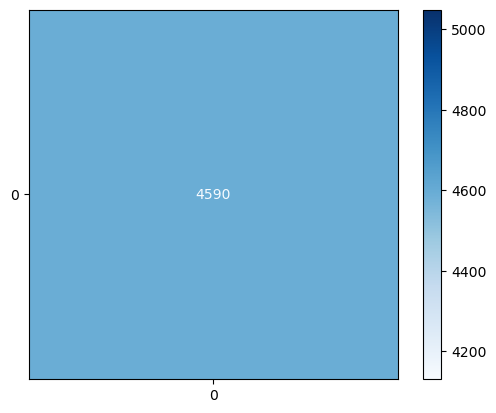

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Make predictions
y_pred = model.predict(X_test)

# Step 2: Decode predictions and true labels from one-hot encoding
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Step 3: Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[f'Station {i}' for i in range(1, 16)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix appears to have only one class being predicted correctly, with all 4,590 predictions falling into that single class. This indicates that your model is not generalizing well across the 15 different stations and is instead predicting the same class for all inputs.